## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd


## Loading Dataset

In [2]:
df5 = pd.read_csv('D:\\DataSet\\loan_data.csv')

In [3]:
df5.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df5.shape

(614, 13)

## Data Preprocessing

In [5]:
#checking missing values
df5.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df5.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Describing data
df5.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df5['Gender'].mode()

0    Male
dtype: object

In [9]:
#filling missing values
df5['Gender'].fillna(df5['Gender'].mode()[0],inplace=True)
df5['Dependents'].fillna(df5['Dependents'].mode()[0],inplace=True)
df5['Self_Employed'].fillna(df5['Self_Employed'].mode()[0],inplace=True)
df5['LoanAmount'].fillna(df5['LoanAmount'].mean(),inplace=True)
df5['Loan_Amount_Term'].fillna(df5['Loan_Amount_Term'].mean(),inplace=True)
df5['Credit_History'].fillna(df5['Credit_History'].mean(),inplace=True)
df5['Married'].fillna(df5['Married'].mode()[0],inplace=True)


In [10]:
df5.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Converting Categorical Values into Numerical Values

In [11]:
df5.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [12]:
df5.drop(['Loan_ID'],axis=1,inplace=True)

In [13]:
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
#Finding count of categorical values
print(df5['Gender'].value_counts())
print(df5['Married'].value_counts())
print(df5['Education'].value_counts())
print(df5['Self_Employed'].value_counts())
print(df5['Property_Area'].value_counts())
print(df5['Loan_Status'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [15]:
#Changing Categorical Values into Numerical Values
df5['Gender']=df5['Gender'].map({'Male':1 , 'Female':0})
df5['Married']=df5['Married'].map({'Yes':1 , 'No':0})
df5['Education']=df5['Education'].map({'Graduate':1 , 'Not Graduate':0})
df5['Self_Employed']=df5['Self_Employed'].map({'Yes':1 , 'No':0})
df5['Property_Area']=df5['Property_Area'].map({'Urban':2 , 'Semiurban':1 , 'Rural':0})
df5['Loan_Status']=df5['Loan_Status'].map({'Y':1 , 'N':0})


In [16]:
df5['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df5['Dependents']= df5['Dependents'].map({'0':0,'1':1,'2':2,'3+':4})

In [18]:
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## Scaling The Data

In [19]:
df5.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [20]:
df5.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler 

In [22]:
sc= StandardScaler()

In [23]:
mms= MinMaxScaler()

In [24]:
mms.fit(df5)

MinMaxScaler()

In [25]:
df3= mms.transform(df5)

In [26]:
df3=pd.DataFrame(df3,columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])

In [27]:
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.00,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.25,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.00,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.00,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.00,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


## Seperating Dependent and Independent variables

In [28]:
X=df3.drop(['Loan_Status'],axis=1)

In [29]:
y=df3['Loan_Status']

## Train Test Splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=df3['Loan_Status'],test_size=0.2,random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(491, 11)
(123, 11)
(123,)
(491,)


## Creating Model

In [33]:
import keras

In [34]:
import tensorflow as tf

In [35]:
#importing sequential model
from keras.models import Sequential

In [36]:
#importing different layers
from keras.layers import InputLayer , Dense

In [39]:
X_train.shape[1]

11

In [40]:
#defining input_neurons
input_neurons = X_train.shape[1]

In [41]:
#defining output_neurons
output_neurons =1

In [42]:
number_of_hidden_layers=2
neuron_hidden_layer_1=10
neuron_hidden_layer_2=5

In [45]:
#Defining Architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units=output_neurons,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [48]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [49]:
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
16/16 [==============================] - 27s 77ms/step - loss: 0.6702 - accuracy: 0.6015 - val_loss: 0.6217 - val_accuracy: 0.6829
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.7243 - val_loss: 0.5856 - val_accuracy: 0.7967
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5888 - accuracy: 0.7783 - val_loss: 0.5614 - val_accuracy: 0.7642
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5754 - accuracy: 0.7648 - val_loss: 0.5464 - val_accuracy: 0.7724
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.7472 - val_loss: 0.5337 - val_accuracy: 0.7805
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5700 - accuracy: 0.7676 - val_loss: 0.5225 - val_accuracy: 0.7967
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5599 - accuracy: 0.7609 - val_loss: 0.5122 - val_accuracy: 0.7967
Epoch 8/50
16/16 [

In [50]:
prediction = model.predict_classes(X_test)

c:\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [55]:
from sklearn.metrics import accuracy_score

## Accuracy Score

In [56]:
accuracy_score(y_test,prediction)

0.8617886178861789

## Visualising loss and accuracy

In [57]:
model_history.history['loss']

[0.6570029854774475,
 0.6178683638572693,
 0.5970090627670288,
 0.5807672142982483,
 0.5701347589492798,
 0.5604164004325867,
 0.5512424111366272,
 0.5442739725112915,
 0.5362784266471863,
 0.5301485061645508,
 0.5241067409515381,
 0.5197423100471497,
 0.5154938101768494,
 0.5116175413131714,
 0.5078017115592957,
 0.5041462182998657,
 0.5032327175140381,
 0.5000826120376587,
 0.4972442388534546,
 0.49467265605926514,
 0.492587685585022,
 0.4906952381134033,
 0.4892720878124237,
 0.48721054196357727,
 0.486883282661438,
 0.4859175384044647,
 0.4841499626636505,
 0.48296400904655457,
 0.4825039803981781,
 0.48233357071876526,
 0.48042812943458557,
 0.48067668080329895,
 0.4812855124473572,
 0.4801526963710785,
 0.47906067967414856,
 0.47783949971199036,
 0.47780507802963257,
 0.47728055715560913,
 0.476624995470047,
 0.47730323672294617,
 0.47723400592803955,
 0.4777108430862427,
 0.47703051567077637,
 0.47453534603118896,
 0.475321888923645,
 0.4742244780063629,
 0.4735339879989624,
 0.

In [58]:
import matplotlib.pyplot as plt

## Plotting Loss

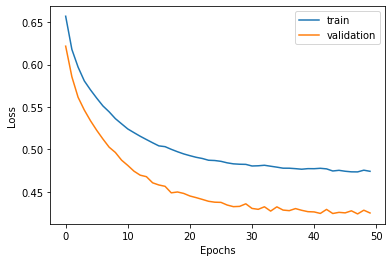

In [61]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()

## Plotting accuracy

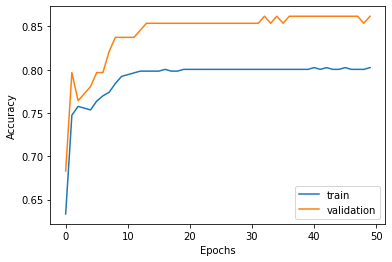

In [62]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='lower right')
plt.show()

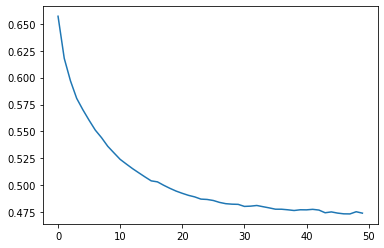

In [63]:
plt.plot(model_history.history['loss'])